https://developer.ibm.com/exchanges/models/all/max-audio-embedding-generator/

docker run -it -p 5000:5000 codait/max-audio-embedding-generator

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import itertools
import requests
import numpy as np
import sys
from tqdm import tqdm
from functools import reduce
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sys.path.append('~/Acoustics/feature_analysis')

In [14]:
def get_audio_embedding(wav_path):
    files = {
        'audio': (wav_path, open(wav_path, 'rb')),
    }

    response = requests.post('http://localhost:5000/model/predict', files=files)
    embedding = np.array(response.json()['embedding'])
    return embedding

In [ ]:
from utils.util import get_ESC50_tags, get_ESC50_wavfile, get_ESC50_wavfile_by_tag

In [8]:
tags = list(get_ESC50_tags().keys())

In [9]:
tags

['pig',
 'train',
 'crying_baby',
 'hen',
 'glass_breaking',
 'chainsaw',
 'coughing',
 'snoring',
 'keyboard_typing',
 'toilet_flush',
 'insects',
 'cow',
 'siren',
 'helicopter',
 'brushing_teeth',
 'sneezing',
 'crickets',
 'sea_waves',
 'mouse_click',
 'frog',
 'pouring_water',
 'fireworks',
 'crackling_fire',
 'clock_alarm',
 'wind',
 'sheep',
 'cat',
 'washing_machine',
 'can_opening',
 'clapping',
 'laughing',
 'church_bells',
 'rain',
 'chirping_birds',
 'dog',
 'drinking_sipping',
 'crow',
 'hand_saw',
 'rooster',
 'thunderstorm',
 'airplane',
 'breathing',
 'door_wood_knock',
 'footsteps',
 'engine',
 'door_wood_creaks',
 'clock_tick',
 'vacuum_cleaner',
 'car_horn',
 'water_drops']

In [15]:
tag_wavs = {}

for tag in tags:
    tag_wavs[tag] = get_ESC50_wavfile_by_tag(tag)

In [16]:
tag_embeddings = {}

for tag in tqdm(tags):
    tag_embeddings[tag] = []
    for wav in tag_wavs[tag]:
        tag_embeddings[tag].append(get_audio_embedding(wav))

100%|██████████| 50/50 [07:52<00:00,  9.50s/it]


In [17]:
from sklearn.manifold import TSNE

In [25]:
merged = reduce(lambda x, y: np.vstack([x, y]), list(tag_embeddings.values()))
merged = merged.mean(axis=1)

model = TSNE(n_components=3, random_state=42)

reduced = model.fit_transform(merged)

lens = [np.array(df).shape[0] for df in list(tag_embeddings.values())]
cumsum = [0] + list(itertools.accumulate(lens))

reduced = [reduced[cumsum[i]:cumsum[i]+lens[i], :] for i in range(len(list(tag_embeddings.values())))]

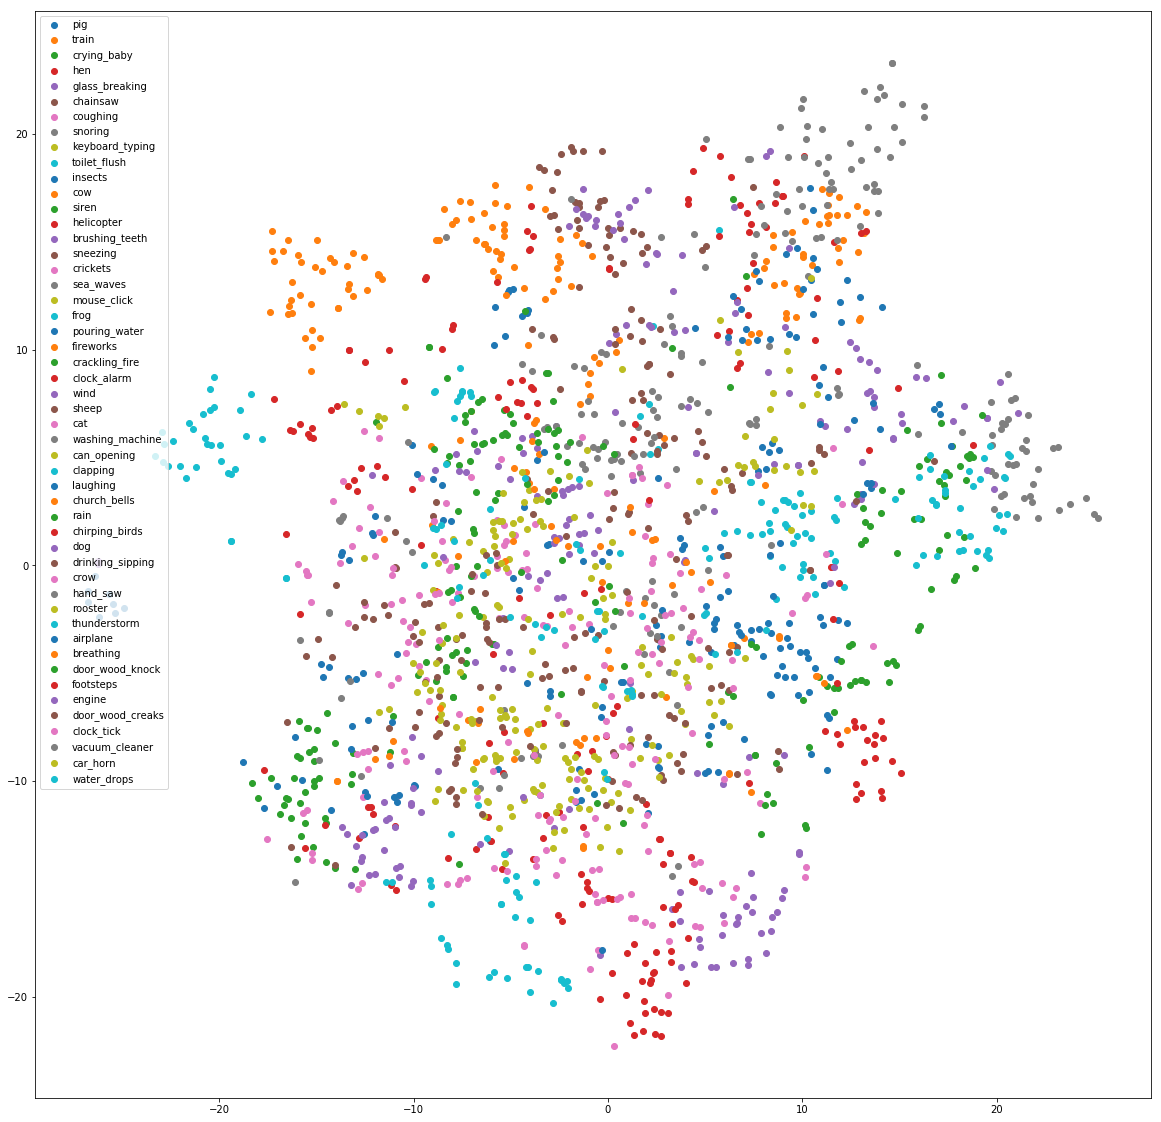

In [26]:
plt.figure(figsize=(20, 20))

for i, tag in enumerate(tags):
    plt.scatter(reduced[i][:, 0], reduced[i][:, 1], label=tag)
    
plt.legend()
plt.show()

100%|██████████| 50/50 [00:00<00:00, 1371.60it/s]


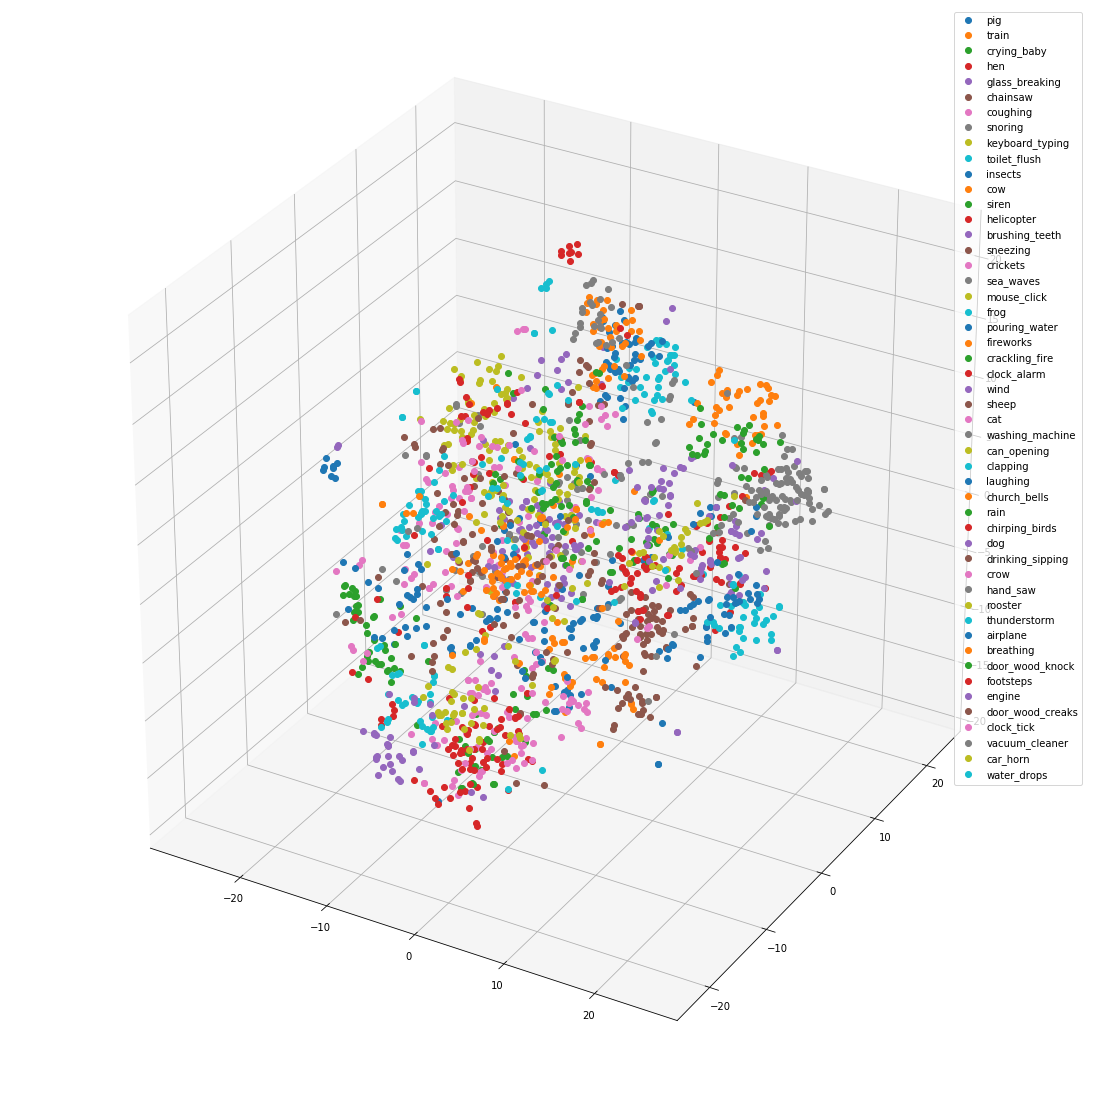

In [27]:
fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig)

for i, tag in enumerate(tqdm(tags)):
    ax.plot(reduced[i][:, 0], reduced[i][:, 1], reduced[i][:, 2], 'o', label=tag)

plt.legend()
plt.show()

In [19]:
from sklearn.decomposition import PCA

In [34]:
model = PCA(n_components=3)

In [35]:
data = reduce(lambda x, y: np.vstack([x, y]), list(tag_embeddings.values()))

In [36]:
model.fit(data.mean(axis=1))

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

100%|██████████| 50/50 [00:00<00:00, 604.37it/s]


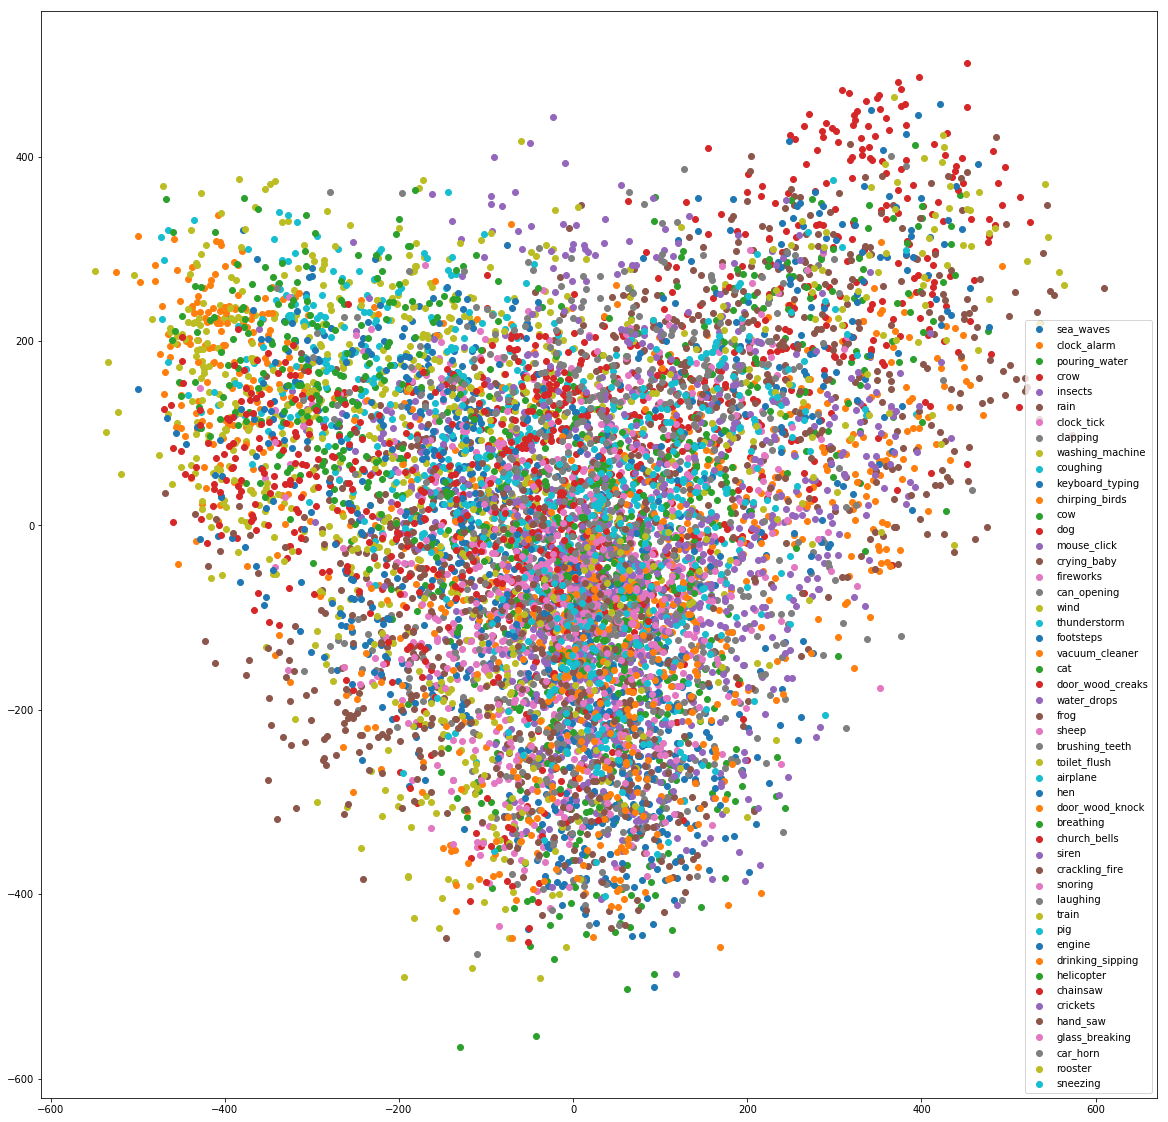

In [37]:
plt.figure(figsize=(20, 20))

for tag in tqdm(tags):
    
    data = reduce(lambda x, y: np.vstack([x, y]), tag_embeddings[tag])
    reduced = model.transform(data)
    
    plt.scatter(reduced[:, 0], reduced[:, 1], label=tag)

plt.legend()
plt.show()

100%|██████████| 50/50 [00:00<00:00, 932.97it/s]


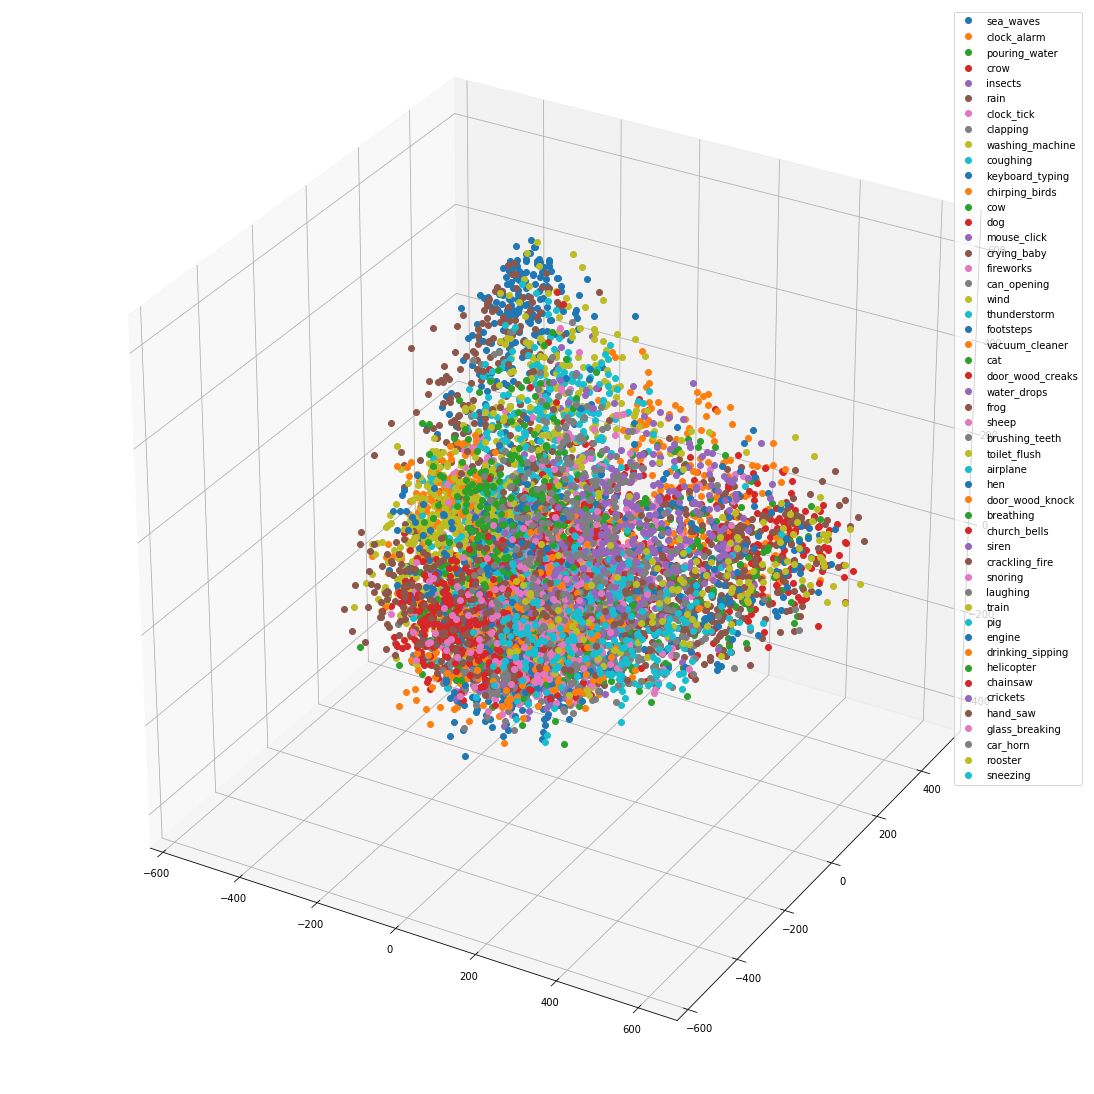

In [40]:
fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig)

for tag in tqdm(tags):
    
    data = reduce(lambda x, y: np.vstack([x, y]), tag_embeddings[tag])
    reduced = model.transform(data)
    
    ax.plot(reduced[:, 0], reduced[:, 1], reduced[:, 2], 'o', label=tag)

plt.legend()
plt.show()